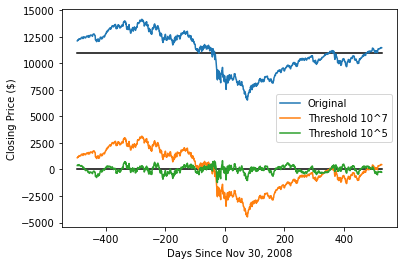

In [1]:
# 8
import numpy as np
from scipy.fft import rfft, irfft
import matplotlib.pyplot as plt
import pandas


file = open("dow.txt", "r")
dow = file.read()
dow = dow.replace('\n', ' ').split(" ")[:-1]
dow = np.array(list(map(float,dow)))
file.close()

# rfft is designed for real input and only gives first half of coefficients
y = rfft(dow)
ynorm = np.abs(y)

y1 = y
y1[ynorm > 10000000] = 0
x1 = irfft(y1)

y2 = y
y2[ynorm > 100000] = 0
x2 = irfft(y2)

days = np.arange(1024)-496

plt.plot(days,np.zeros(1024),color="k")
plt.plot(days,np.ones(1024)*np.mean(dow),color="k")
plt.plot(days,dow, label="Original")
plt.plot(days,x1, label="Threshold 10^7")
plt.plot(days,x2, label="Threshold 10^5")
plt.xlabel("Days Since Nov 30, 2008")
plt.ylabel("Closing Price ($)")
plt.legend()
plt.show()

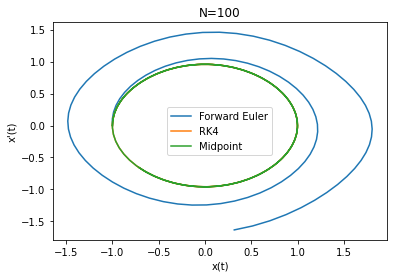

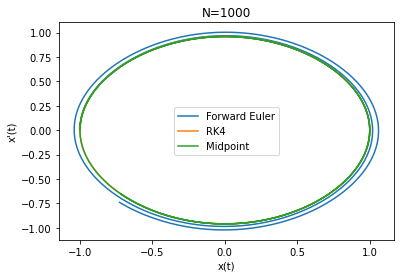

In [2]:
# 9
import math

x0 = -1
v0 = 0

def ForwardEuler(N):
    w = [x0]
    v = [v0]
    h = 4*np.pi/N
    for i in range(N):
        w.append(w[-1]+h*v[-1])
        v.append(v[-1]+h*(-math.sin(w[-2])))
    return (w,v)

def RK4(N):
    w = [x0]
    v = [v0]
    h = 4*np.pi/N
    for i in range(N):
        j1 = h*(-math.sin(w[-1]))
        k1 = h*v[-1]
        j2 = h*(-math.sin(w[-1]+k1/2))
        k2 = h*(v[-1]+j1/2)
        j3 = h*(-math.sin(w[-1]+k2/2))
        k3 = h*(v[-1]+j2/2)
        j4 = h*(-math.sin(w[-1]+k3))
        k4 = h*(v[-1]+j3)
        v.append(v[-1]+(j1+2*j2+2*j3+j4)/6)
        w.append(w[-1]+(k1+2*k2+2*k3+k4)/6)
    return (w,v)

iterF = lambda x, xnew, h: x + h*np.array([-math.sin()])
def Midpoint(N):
    w = [x0]
    v = [v0]
    h = 4*np.pi/N
    for i in range(N):
        wold, vold = 0, 0
        wnew, vnew = w[-1], v[-1]
        start = False
        while np.abs([vold-vnew,wold-wnew]).max() >= 10**-10 or start==False:
            wold, vold = wnew, vnew
            vnew = v[-1] + h*(-math.sin((w[-1]+wold)/2))
            wnew = w[-1] + h*(v[-1]+vold)/2
            start = True
        w.append(wnew)
        v.append(vnew)
    return (w,v)


Euler1 = ForwardEuler(100)
RK1 = RK4(100)
Midpoint1 = Midpoint(100)
plt.plot(Euler1[0], Euler1[1], label="Forward Euler")
plt.plot(RK1[0], RK1[1], label="RK4")
plt.plot(Midpoint1[0], Midpoint1[1], label="Midpoint")
plt.xlabel("x(t)")
plt.ylabel("x'(t)")
plt.title("N=100")
plt.legend()
plt.show()

Euler2 = ForwardEuler(1000)
RK2 = RK4(1000)
Midpoint2 = Midpoint(1000)
plt.plot(Euler2[0], Euler2[1], label="Forward Euler")
plt.plot(RK2[0], RK2[1], label="RK4")
plt.plot(Midpoint2[0], Midpoint2[1], label="Midpoint")
plt.xlabel("x(t)")
plt.ylabel("x'(t)")
plt.title("N=1000")
plt.legend()
plt.show()



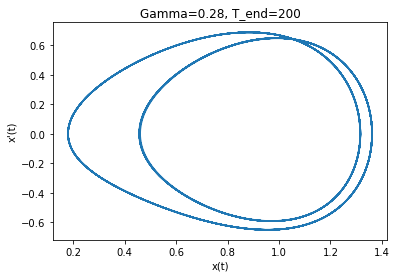

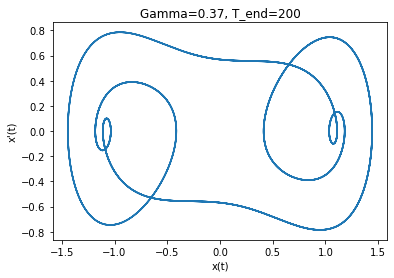

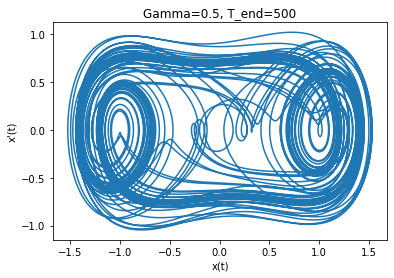

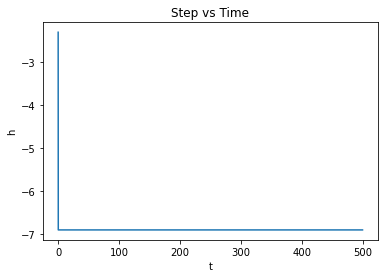

In [3]:
# 10

d,a,b,W=0.3,-1,1,1.2
hmin,hmax=10**-3,0.5
qmin,qmax=0.1,4
tol=10**-5
x0,v0=1,0.2

def ATS(gamma, tend):
    f = lambda x,v,t: gamma*math.cos(W*t)-d*v-a*x-b*x**3
    h = 0.1
    H = [h] #need to remove at end
    Ts = [0]
    w = [x0]
    v = [v0]
    while Ts[-1] < tend:
        h = min(h, tend-Ts[-1])
        while True:
            y1 = w[-1]+h/2*v[-1]
            j1 = v[-1]+h/2*f(w[-1],v[-1],Ts[-1])
            y2 = w[-1]+h*j1
            j2 = v[-1]+h*f(y1,j1,Ts[-1]+h/2)
            eps = np.abs([y2-y1,j2-j1]).max()/h
            if eps < tol or h == hmin:
                w.append(y2)
                v.append(j2)
                H.append(h)
                Ts.append(Ts[-1]+h)
                h = min(h*2,hmax)
                break
            else:
                q=tol/(2*eps)
                q = min(max(q,qmin),qmax)
                h = q*h
                h = min(max(h,hmin),hmax)
    return np.array(w),np.array(v),np.array(Ts),np.array(H)

w,v,Ts,H = ATS(0.28,200)
plt.plot(w[Ts>=100], v[Ts>=100])
plt.title("Gamma=0.28, T_end=200")
plt.xlabel("x(t)")
plt.ylabel("x'(t)")
plt.show()

w,v,Ts,H = ATS(0.37,200)
plt.plot(w[Ts>=100], v[Ts>=100])
plt.title("Gamma=0.37, T_end=200")
plt.xlabel("x(t)")
plt.ylabel("x'(t)")
plt.show()

w,v,Ts,H = ATS(0.5,500)
plt.plot(w, v)
plt.title("Gamma=0.5, T_end=500")
plt.xlabel("x(t)")
plt.ylabel("x'(t)")
plt.show()

plt.plot(Ts,np.log(H))
plt.title("Step vs Time")
plt.xlabel("t")
plt.ylabel("h")
plt.show()



In [9]:
test = [1,2,3,4,5,6,7]
test[::3]

[1, 4, 7]